In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The csv file is read and stored into 'movie'

In [ ]:
movie = pd.read_csv('movie_metadata.csv')

STEP 1

In [ ]:
print(movie.head())

   color      director_name  ...  aspect_ratio  movie_facebook_likes
0  Color      James Cameron  ...          1.78                 33000
1  Color     Gore Verbinski  ...          2.35                     0
2  Color         Sam Mendes  ...          2.35                 85000
3  Color  Christopher Nolan  ...          2.35                164000
4    NaN        Doug Walker  ...           NaN                     0

[5 rows x 28 columns]


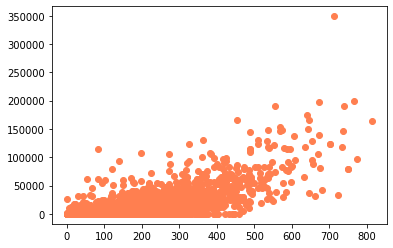

In [ ]:
plt.scatter(movie['num_critic_for_reviews'],movie['movie_facebook_likes'],c='coral')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

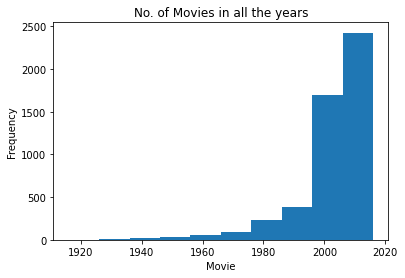

In [ ]:
plt.hist(movie['title_year'])
plt.title('No. of Movies in all the years')
plt.xlabel('Movie')
plt.ylabel('Frequency')

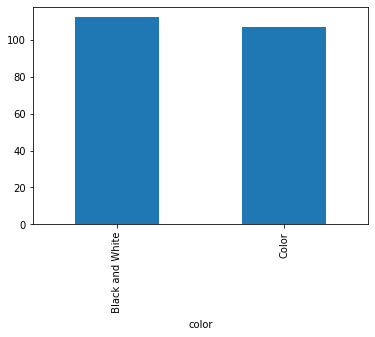

In [ ]:
movie.groupby(movie['color'])['duration'].mean().plot.bar()

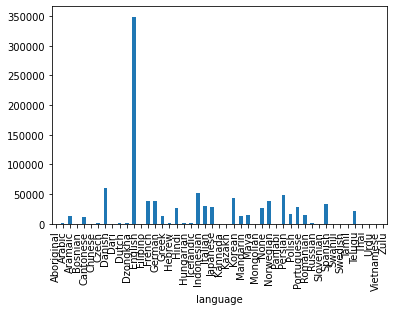

In [ ]:
movie.groupby(movie['language'])['movie_facebook_likes'].max().plot.bar()

In [ ]:
movie.describe()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
movie.nlargest(3,'imdb_score')['movie_title']
X['aspect_ratio']=movie.iloc[:,-2]
X['movie_facebook_likes']=movie.iloc[:,-1]


STEP 2

the imdb rating is stored in y
X contains all the columns except the imdb rating

In [ ]:
y=movie.iloc[:,-3]
X=movie.iloc[:,:-3]
X= pd.concat([X,movie.iloc[:,-2]], axis=1)
X= pd.concat([X,movie.iloc[:,-1]], axis=1)
X_1=X._get_numeric_data()
X_2= X.select_dtypes(include=['object'])
X_2

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,Daphne Zuniga,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,Crystal Lowe,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,English,Canada,NaN
5039,Color,NaN,Valorie Curry,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,Sam Underwood,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14
5040,Color,Benjamin Roberds,Maxwell Moody,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,David Chandler,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN
5041,Color,Daniel Hsia,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,Eliza Coupe,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13


In [ ]:
cols=[3,5,7,8]

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [ ]:
X_2=X_2.drop(X_2.columns[cols],axis=1)
X_2

,color,director_name,actor_2_name,actor_1_name,actor_3_name,language,country,content_rating
0,Color,James Cameron,Joel David Moore,CCH Pounder,Wes Studi,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Jack Davenport,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Stephanie Sigman,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,Joseph Gordon-Levitt,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Doug Walker,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,Daphne Zuniga,Eric Mabius,Crystal Lowe,English,Canada,NaN
5039,Color,NaN,Valorie Curry,Natalie Zea,Sam Underwood,English,USA,TV-14
5040,Color,Benjamin Roberds,Maxwell Moody,Eva Boehnke,David Chandler,English,USA,NaN
5041,Color,Daniel Hsia,Daniel Henney,Alan Ruck,Eliza Coupe,English,USA,PG-13


Here the missing values are filled in with values that occur most frequently in that paticular column

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_2)
X_2= imputer.transform(X_2)
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer1.fit(X_1)
X_1= imputer1.transform(X_1)

In [ ]:
print(X_2)

[['Color' 'James Cameron' 'Joel David Moore' ... 'English' 'USA' 'PG-13']
 ['Color' 'Gore Verbinski' 'Orlando Bloom' ... 'English' 'USA' 'PG-13']
 ['Color' 'Sam Mendes' 'Rory Kinnear' ... 'English' 'UK' 'PG-13']
 ...
 ['Color' 'Benjamin Roberds' 'Maxwell Moody' ... 'English' 'USA' 'R']
 ['Color' 'Daniel Hsia' 'Daniel Henney' ... 'English' 'USA' 'PG-13']
 ['Color' 'Jon Gunn' 'Brian Herzlinger' ... 'English' 'USA' 'PG']]


Here i have split the genre columns into different columns 

In [ ]:
data1= X.iloc[:,9].apply(lambda x: tuple(map(str, x.split('|'))) )

In [ ]:
import pandas
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
expandedLabelData = mlb.fit_transform(data1.apply(frozenset))

labelClasses = mlb.classes_

expandedLabels = pandas.DataFrame(expandedLabelData, columns=labelClasses)

expandedLabels contains the different columns of genre

In [ ]:
expandedLabels
X_1=pd.DataFrame(X_1)

The expandedLabel columns is then added to the numeric column 

In [ ]:
X_1= pd.concat([X_1,expandedLabels], axis=1)

In [ ]:
X_1

To encode the categorical columns we first found the the categorical columns from X.                     The columns then had to be label encoded first as one hot encoder does not accept numeric values after label encoding the columns one hot encoding was done as label encoding alone would give a hierarichal order to the values in the columns

In [ ]:
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing


X=pd.DataFrame(X)
X_2=pd.DataFrame(X_2)


X_2=X_2.astype(str)

le = preprocessing.LabelEncoder()
X_2 = X_2.apply(le.fit_transform)

X_2.shape






(5043, 8)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = preprocessing.OneHotEncoder()
enc.fit(X_2)
X_2 = enc.transform(X_2).toarray()
X_2.shape

(5043, 11180)

After encoding the categorical columns the numeric and the categorical columns were combined to give X

In [ ]:
X_1=pd.DataFrame(X_1)
X_2=pd.DataFrame(X_2)
X= pd.concat([X_2, X_1], axis=1)
print(X)


        0    1    2    3    4  ...  Short  Sport  Thriller  War  Western
0     0.0  1.0  0.0  0.0  0.0  ...      0      0         0    0        0
1     0.0  1.0  0.0  0.0  0.0  ...      0      0         0    0        0
2     0.0  1.0  0.0  0.0  0.0  ...      0      0         1    0        0
3     0.0  1.0  0.0  0.0  0.0  ...      0      0         1    0        0
4     0.0  1.0  0.0  0.0  0.0  ...      0      0         0    0        0
...   ...  ...  ...  ...  ...  ...    ...    ...       ...  ...      ...
5038  0.0  1.0  0.0  0.0  0.0  ...      0      0         0    0        0
5039  0.0  1.0  0.0  0.0  0.0  ...      0      0         1    0        0
5040  0.0  1.0  0.0  0.0  0.0  ...      0      0         1    0        0
5041  0.0  1.0  0.0  0.0  0.0  ...      0      0         0    0        0
5042  0.0  1.0  0.0  0.0  0.0  ...      0      0         0    0        0

[5043 rows x 11221 columns]


The duplicate columns were then removed from X

In [ ]:
X1=X.T
X1=X1.drop_duplicates() 

In [ ]:
X=X1.T

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,994.0,245000000.0,2015.0,393.0,2.35,85000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,250000000.0,2012.0,23000.0,2.35,164000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,90.0,131.0,1000.0,131.0,3000000.0,8.0,143.0,0.0,1.0,20000000.0,2009.0,12.0,2.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,87.0,2.0,318.0,637.0,3000000.0,629.0,2283.0,2.0,6.0,20000000.0,2013.0,470.0,2.35,84.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5039,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,43.0,0.0,319.0,841.0,3000000.0,73839.0,1753.0,1.0,359.0,20000000.0,2009.0,593.0,16.00,32000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5040,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,76.0,0.0,0.0,0.0,3000000.0,38.0,0.0,0.0,3.0,1400.0,2013.0,0.0,2.35,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5041,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,100.0,0.0,489.0,946.0,10443.0,1255.0,2386.0,5.0,9.0,20000000.0,2012.0,719.0,2.35,660.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


X and y is then split into the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
type(y_train)

pandas.core.series.Series

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
3052,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,95.0,5.0,443.0,1000.0,13558739.0,15427.0,2729.0,0.0,121.0,11000000.0,2001.0,660.0,1.85,449.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,122.0,136.0,0.0,904.0,12000.0,134006721.0,259492.0,15999.0,1.0,415.0,75000000.0,1996.0,2000.0,2.35,51000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1119,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.0,86.0,13.0,553.0,1000.0,25200412.0,16580.0,3423.0,3.0,55.0,45000000.0,2009.0,701.0,1.85,916.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3343,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,222.0,119.0,319.0,179.0,2000.0,4440055.0,21360.0,3279.0,0.0,110.0,8500000.0,2009.0,552.0,1.85,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,98.0,11000.0,967.0,1000.0,13383737.0,29385.0,4302.0,4.0,86.0,20000000.0,1994.0,979.0,1.85,979.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,232.0,85.0,109.0,18.0,200.0,9437933.0,90827.0,332.0,0.0,329.0,180000.0,2007.0,96.0,1.85,26000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,447.0,127.0,0.0,319.0,678.0,225377.0,70382.0,1557.0,1.0,190.0,8900000.0,2012.0,432.0,1.85,33000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,634.0,95.0,246.0,751.0,26000.0,42043633.0,277172.0,29551.0,0.0,986.0,30000000.0,2012.0,821.0,2.35,66000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,479.0,118.0,0.0,520.0,14000.0,138795342.0,503631.0,15732.0,0.0,636.0,15000000.0,2010.0,1000.0,1.85,64000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

After splitting we perform feature scaling on both X_train X_test and y_train y_test individually

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :] = sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = sc.transform(X_test.iloc[:, :])
sc1=StandardScaler()
type(y_train)
y_train=sc1.fit_transform(y_train.values.reshape(-1,1))
y_test= sc1.transform(y_test.values.reshape(-1,1))


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [ ]:
y_train.shape

(4034, 1)

We will now train different regression models to see which fits our dataset the best

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

MULTIPLE LINEAR 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

In [ ]:
y_pred = regressor1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

POLYNOMIAL

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor2 = LinearRegression()
regressor2.fit(X_poly, y_train)

In [ ]:
y_pred = regressor2.predict(poly_reg.transform(X_test))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators=50,max_depth=64, random_state = 0)
regressor3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=64, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor3.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
accuracy=regressor3.score(X_test,y_test)
print(accuracy*100)

SVR

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor2= GradientBoostingRegressor(n_estimators=1000,max_depth=9, random_state = 0)


In [ ]:
regressor2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = regressor2.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5977487628688778

In [ ]:
importance = regressor2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Streaming output truncated to the last 5000 lines.
Feature: 40801, Score: 0.00000
Feature: 40802, Score: 0.00000
Feature: 40803, Score: 0.00000
Feature: 40804, Score: 0.00000
Feature: 40805, Score: 0.00000
Feature: 40806, Score: 0.00000
Feature: 40807, Score: 0.00000
Feature: 40808, Score: 0.00000
Feature: 40809, Score: 0.00000
Feature: 40810, Score: 0.00000
Feature: 40811, Score: 0.00000
Feature: 40812, Score: 0.00000
Feature: 40813, Score: 0.00000
Feature: 40814, Score: 0.00000
Feature: 40815, Score: 0.00000
Feature: 40816, Score: 0.00000
Feature: 40817, Score: 0.00000
Feature: 40818, Score: 0.00000
Feature: 40819, Score: 0.00000
Feature: 40820, Score: 0.00000
Feature: 40821, Score: 0.00000
Feature: 40822, Score: 0.00000
Feature: 40823, Score: 0.00000
Feature: 40824, Score: 0.00000
Feature: 40825, Score: 0.00000
Feature: 40826, Score: 0.00000
Feature: 40827, Score: 0.00000
Feature: 40828, Score: 0.00001
Feature: 40829, Score: 0.00000
Feature: 40830, Score: 0.00000
Feature: 40831, Sco

In [ ]:
y_pred = regressor3.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0.44  0.59]
 [ 0.34  0.5 ]
 [-1.22 -1.18]
 ...
 [-0.94 -0.47]
 [-0.61 -0.03]
 [-0.03 -0.03]]


RIDGE

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(normalize=False,alpha=0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ypred = ridge.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.21196533351804026

In [ ]:
lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
model = Lasso(alpha=0.002).fit(X_train, y_train) 

In [ ]:
ypred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.3406283299704259

In [ ]:
alphas = [0.1,0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ypred = lassocv.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.21196533351804026

XGBOOST

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror',n_estimators=500)

In [ ]:
a=np.array(X_train)
b=np.array(X_test)

In [ ]:
a=pd.DataFrame(a)
b=pd.DataFrame(b)

In [ ]:
model.fit(a, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
ypred = model.predict(b)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.5854052016604834

CATBOOST

In [ ]:
!pip install catboost

In [ ]:
a=np.array(X_train)
b=np.array(X_test)

In [ ]:
a=pd.DataFrame(a)
b=pd.DataFrame(b)

In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(verbose=0,n_estimators=8000)

In [ ]:
model.fit(a, y_train)

In [ ]:
ypred = model.predict(b)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

The accuracy for the CatBoostingRegressor model is the best hence we will use this model to train our dataset

In [ ]:
y_pred = model.predict(b)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0.76  0.59]
 [ 0.39  0.5 ]
 [-1.24 -1.18]
 ...
 [-0.6  -0.47]
 [-0.67 -0.03]
 [ 0.27 -0.03]]
